In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [3]:
dftrain.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
num_columns = dftrain.shape[1]
num_rows = dftrain.shape[0]
print(num_columns,num_rows)



11 1458644


In [5]:
dftrain.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [6]:
dftrain.drop(["id"],axis=1,inplace=True)
dftest.drop(["id"],axis=1,inplace=True)

In [7]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 111.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 

In [11]:
#we have no nan values

In [13]:
#there is no drop off_date time in test dataset 

In [8]:
dftrain.drop(["dropoff_datetime"],axis=1,inplace=True)

In [9]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   passenger_count     1458644 non-null  int64  
 3   pickup_longitude    1458644 non-null  float64
 4   pickup_latitude     1458644 non-null  float64
 5   dropoff_longitude   1458644 non-null  float64
 6   dropoff_latitude    1458644 non-null  float64
 7   store_and_fwd_flag  1458644 non-null  object 
 8   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 100.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           625134 non-null  int64  
 1 

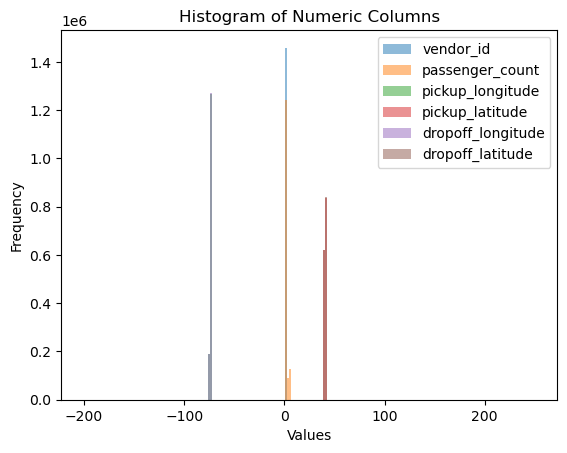

In [16]:
#check distribution of numeric values

# Select the numeric columns you want to plot
dftrainnotarget=dftrain.drop(["trip_duration"],axis=1)
numeric_columns = dftrainnotarget.select_dtypes(include="number").columns

# Plot histogram for each numeric column
for column in numeric_columns:
    plt.hist(dftrainnotarget[column], bins=200, alpha=0.5, label=column, range=(-200,250))

# Add labels and title to the plot
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Columns")

# Add legend to distinguish the columns
plt.legend()

In [17]:
#number of columns are low so all column has a lot of importance so do not delete any

In [10]:
#now check for outliners in numeric values

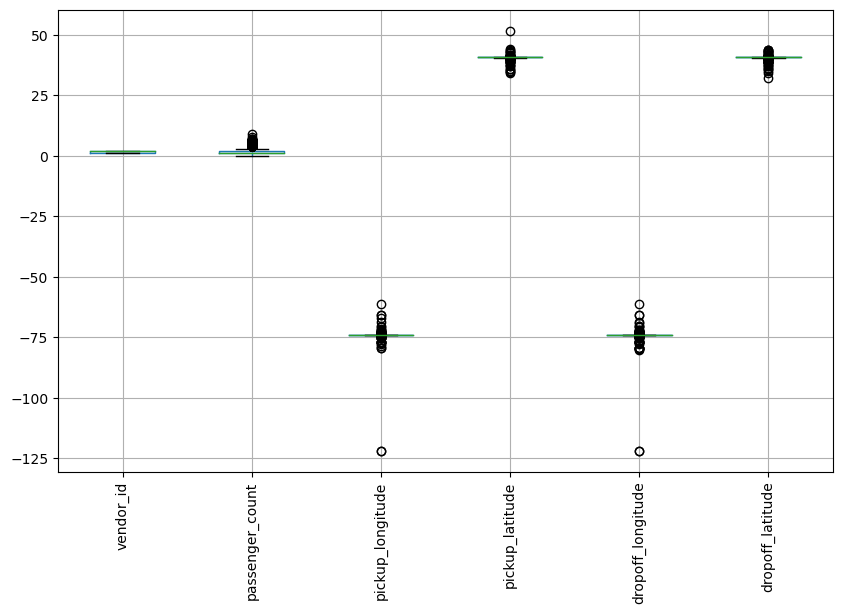

In [12]:
numeric_columns2 = dftrain.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,6))
dftrain.boxplot(column=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

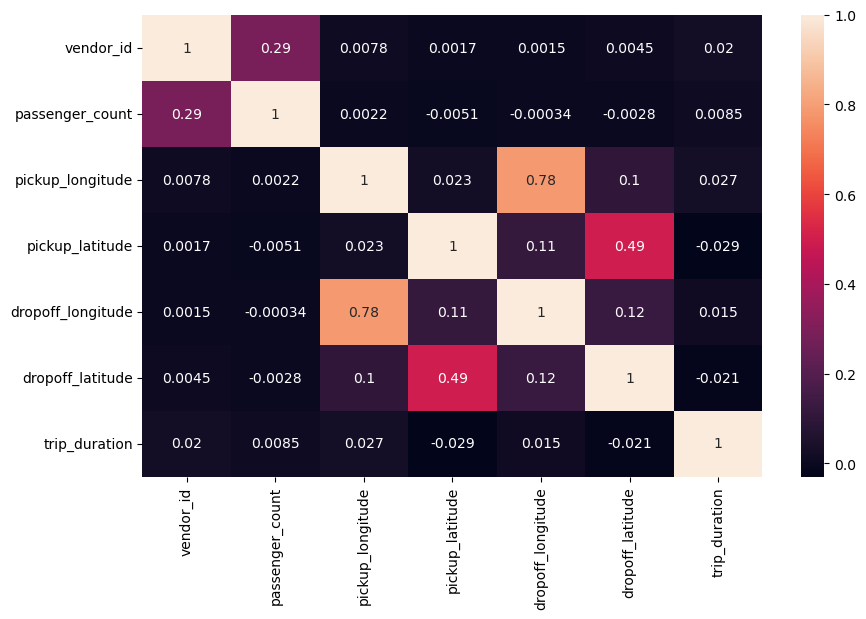

In [13]:
#check for correlation of variables together


plt.figure(figsize=(10,6))
sns.heatmap(data=dftrain.corr(),annot=True)

In [14]:
#high correlation between pick up longitude and dropoff_longitude but do not drop them since all information here are important

In [16]:
#now deal with pick up time

In [19]:

# Convert the time column to datetime if necessary
dftrain['pickup_datetime'] = pd.to_datetime(dftrain['pickup_datetime'])

# Sort the dataset based on the timestamp column
dftrain.sort_values(by='pickup_datetime', inplace=True)

# Calculate the time intervals
dftrain['time_interval'] = dftrain['pickup_datetime'].diff().dt.total_seconds()


# Convert the time column to datetime if necessary
dftest['pickup_datetime'] = pd.to_datetime(dftest['pickup_datetime'])

# Sort the dataset based on the timestamp column
dftest.sort_values(by='pickup_datetime', inplace=True)

# Calculate the time intervals
dftest['time_interval'] = dftest['pickup_datetime'].diff().dt.total_seconds()



In [20]:
dftrain.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,time_interval
96469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849,NaN
223872,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294,36.0
713067,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408,8.0
652463,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280,13.0
722901,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736,6.0


In [21]:
#now remove pick up time
dftrain.drop(["pickup_datetime"],axis=1,inplace=True)
dftest.drop(["pickup_datetime"],axis=1,inplace=True)


In [22]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 96469 to 500524
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  object 
 7   trip_duration       1458644 non-null  int64  
 8   time_interval       1458643 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 111.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 625133 to 0
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           625134 non-null  int64  


In [35]:
#time interval has 1 Nan value in both train and test datasets fill it
from statistics import mean
dftrain['time_interval'].fillna(dftrain['time_interval'].mean(), inplace=True)
dftest['time_interval'].fillna(dftest['time_interval'].mean(), inplace=True)


In [36]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 96469 to 500524
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  int64  
 2   pickup_longitude    1458644 non-null  float64
 3   pickup_latitude     1458644 non-null  float64
 4   dropoff_longitude   1458644 non-null  float64
 5   dropoff_latitude    1458644 non-null  float64
 6   store_and_fwd_flag  1458644 non-null  object 
 7   trip_duration       1458644 non-null  int64  
 8   time_interval       1458644 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 111.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 625133 to 0
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           625134 non-null  int64  


In [37]:
dumtrain=pd.get_dummies(dftrain,columns = ["store_and_fwd_flag"]
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ["store_and_fwd_flag"]
               ,drop_first = True)

In [38]:
dumtrain.info()
dumtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 96469 to 500524
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1458644 non-null  int64  
 1   passenger_count       1458644 non-null  int64  
 2   pickup_longitude      1458644 non-null  float64
 3   pickup_latitude       1458644 non-null  float64
 4   dropoff_longitude     1458644 non-null  float64
 5   dropoff_latitude      1458644 non-null  float64
 6   trip_duration         1458644 non-null  int64  
 7   time_interval         1458644 non-null  float64
 8   store_and_fwd_flag_Y  1458644 non-null  uint8  
dtypes: float64(5), int64(3), uint8(1)
memory usage: 101.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 625133 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id            

In [39]:
#normalization


from sklearn.preprocessing import StandardScaler
#  columns except 'column_to_exclude'
column_to_exclude = 'trip_duration'

# Get the column names to be scaled (excluding the column to exclude)
columns_to_scale = [col for col in dumtrain.columns if col != column_to_exclude]

# Create a new DataFrame with the selected columns
dftrain_scaled = dumtrain.drop(["trip_duration"],axis=1)

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftrain_scaled[columns_to_scale] = scaler.fit_transform(dumtrain[columns_to_scale])

#  'column_to_concat'
column_to_concat = dumtrain["trip_duration"] # Example column data

# Concatenate the column to the DataFrame
df_concatenated = pd.concat([dftrain_scaled, column_to_concat], axis=1)

finaltrain=df_concatenated




# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftest_scaled= scaler.fit_transform(dumtest)
finaltest=pd.DataFrame(dftest_scaled)



In [40]:
finaltrain.info()
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 96469 to 500524
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1458644 non-null  float64
 1   passenger_count       1458644 non-null  float64
 2   pickup_longitude      1458644 non-null  float64
 3   pickup_latitude       1458644 non-null  float64
 4   dropoff_longitude     1458644 non-null  float64
 5   dropoff_latitude      1458644 non-null  float64
 6   time_interval         1458644 non-null  float64
 7   store_and_fwd_flag_Y  1458644 non-null  float64
 8   trip_duration         1458644 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 111.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       625134 non-null  float64
 1   1       625134 non-nu

In [41]:
finaltrain.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,time_interval,store_and_fwd_flag_Y,trip_duration
96469,0.932380,2.537943,-0.116450,-0.965985,0.489621,2.156060,0.000000,-0.074471,849
223872,-1.072524,-0.505637,-0.163582,-0.114206,0.217680,-0.955917,0.858216,-0.074471,1294
713067,0.932380,2.537943,0.115761,1.524269,0.367150,1.765668,-0.094616,-0.074471,408
652463,-1.072524,-0.505637,-0.124198,0.012482,-0.253735,-0.040679,0.075532,-0.074471,280
722901,-1.072524,-0.505637,0.047647,0.270034,-0.225656,-0.245494,-0.162676,-0.074471,736


In [42]:
finaltest.head()

,0,1,2,3,4,5,6,7
0,0.932505,0.257940,-0.112215,-1.140673,0.056890,0.490249,0.000000,-0.074277
1,-1.072381,-0.504667,-0.039340,-0.581783,1.642596,3.907238,-0.346284,-0.074277
2,-1.072381,0.257940,0.018357,0.299432,1.334750,-0.087964,0.557649,-0.074277
3,-1.072381,-0.504667,-0.446234,-0.239393,0.276315,0.855598,0.051447,-0.074277
4,-1.072381,-0.504667,-0.406729,-0.865126,-0.383011,-0.507301,0.629964,-0.074277


In [43]:
X=finaltrain.drop("trip_duration",axis=1)
y= finaltrain['trip_duration']

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regression models
linear_regression = LinearRegression()
ridge_regression = Ridge(alpha=0.5)  # Set the alpha parameter for Ridge regression
lasso_regression = Lasso(alpha=0.1)  # Set the alpha parameter for Lasso regression
decision_tree_regression = DecisionTreeRegressor(max_depth=5)  # Set the max_depth parameter for Decision Tree regression
random_forest_regression = RandomForestRegressor(n_estimators=100,max_depth=11)  # Set the n_estimators parameter for Random Forest regression

linear_regression.fit(X,y)
prediction0lg0model=linear_regression.predict(X_test)
print("Linear regression Mean Square error:",mean_squared_error(prediction0lg0model,y_test))
      
ridge_regression.fit(X,y)
prediction0ridge0=ridge_regression.predict(X_test)
print("ridgi regression Mean Square error:",mean_squared_error(prediction0ridge0,y_test))   
      
lasso_regression .fit(X,y)
prediction0Lasso0=lasso_regression .predict(X_test)
print("Lasso regression Mean Square error:",mean_squared_error(prediction0Lasso0,y_test)) 
      
decision_tree_regression.fit(X,y)
prediction0dtr0=decision_tree_regression.predict(X_test)
print("dtr regression Mean Square error:",mean_squared_error(prediction0dtr0,y_test))
      

random_forest_regression.fit(X,y)
prediction0rf0=random_forest_regression.predict(X_test)
print("rf0 regression Mean Square error:",mean_squared_error(prediction0rf0,y_test))

Linear regression Mean Square error: 20648813.435573753
ridgi regression Mean Square error: 20648813.430731922
Lasso regression Mean Square error: 20648794.824813385
dtr regression Mean Square error: 20491897.028479144
rf0 regression Mean Square error: 11066586.916367399


In [44]:
predictiontestcv=random_forest_regression.predict(finaltest)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('RandomForesrt0.csv')

C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
